In [2]:
pip install csaps

In [3]:
import os
import pandas as pd
import numpy as np
from csaps import csaps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/Colab\ Notebooks/ResearchProject

/content/drive/MyDrive/Colab Notebooks/ResearchProject


In [6]:
cd JianpingLaptop

/content/drive/MyDrive/Colab Notebooks/ResearchProject/JianpingLaptop


In [ ]:
df = pd.read_csv('/home/d_nguyen11/Documents/reu_stats_2024/datafiles/001/Dexcom_001.csv')
df.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace=True)
df.rename(columns={'Glucose Value (mg/dL)': 'glucose'}, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df[['datetime', 'glucose']]
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/d_nguyen11/Documents/reu_stats_2024/datafiles/001/Dexcom_001.csv'

In [ ]:
import shutil
folder_path = '/home/d_nguyen11/Documents/reu_stats_2024/datafiles/'
files = os.listdir(folder_path)
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
    shutil.rmtree(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose')
  else:
    ind = f'0{i}'
    shutil.rmtree(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose')

In [ ]:
def glucose_grabber(ind):

  new_folder_name = "activity_glucose"
  new_folder_path = os.path.join(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}', new_folder_name)
  os.makedirs(new_folder_path, exist_ok=True)

  df2 = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/Dexcom_{ind}.csv')
  df2.rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace=True)
  df2.rename(columns={'Glucose Value (mg/dL)': 'glucose'}, inplace=True)
  df2['datetime'] = pd.to_datetime(df2['datetime'])
  df2 = df2[['datetime', 'glucose']]
  df2.reset_index(drop=True, inplace=True)

  bouts = os.listdir(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/bouts')
  for bout in bouts:
    if bout.endswith('.csv'):
      df1 = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/bouts/{bout}')
      df1['datetime'] = pd.to_datetime(df1['datetime'])

      start = df1['datetime'].min()
      end = df1['datetime'].max() + pd.Timedelta(hours=1)

      total_duration = df1['datetime'].max() - df1['datetime'].min()
      duration = total_duration.total_seconds() / 60
      if duration < 20:
        continue


      glucose_record = df2.loc[(df2['datetime'] >= start) & (df2['datetime'] < end)]
      if glucose_record.isnull().any().any():
        continue
      glucose_record['duration'] = duration
      glucose_record = glucose_record[['datetime', 'duration', 'glucose']]

      glucose_record.reset_index(drop=True, inplace=True)
      if len(glucose_record) < 13:
        continue

      glucose_record.to_csv(f'{new_folder_path}/{bout}', index=False)




In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  glucose_grabber(ind)

We then tried the tensor product splines under the generalized additive models made available by the csaps package.



In [7]:
def pre(ind):
  folder_path = os.path.join(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose')
  files = os.listdir(folder_path)
  df_list = []
  A = []
  T = np.arange(0, 65, 5)
  glucose = []

  for bout in files:
    df = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose/{bout}')
    df = df.tail(13) # We only select the one hour period after activity has ended
    df.reset_index(drop=True, inplace=True)
    random_perturbation = np.random.normal(0, 0.01)
    df['duration'] = df['duration'] + random_perturbation
    if df['duration'].iloc[0] > 180:
      continue
    # df['time'] = df.index * 5
    A.append(df['duration'].iloc[0])
    df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
    df_list.append(df)
    glucose.append(list(df['d_glucose']))

  sorted_dflist = sorted(df_list, key=lambda x: x['duration'].iloc[0])
  df_list = sorted_dflist

  A = sorted(A)
  glucose = np.array(glucose)
  T = np.array(T)
  A = np.array(A)

  return glucose, A, T

In [ ]:
ind = '001'
folder_path = os.path.join(f'/{ind}/activity_glucose')

In [8]:
def pre(ind):
  folder_path = os.path.join(f'/content/drive/MyDrive/Colab\ Notebooks/ResearchProject/JianpingLaptop/{ind}/activity_glucose')
  files = os.listdir(folder_path)
  df_list = []
  A = []
  T = np.arange(0, 65, 5)
  glucose = []

  for bout in files:
    df = pd.read_csv(f'/content/drive/MyDrive/Colab\ Notebooks/ResearchProject/JianpingLaptop/{ind}/activity_glucose/{bout}')
    df = df.tail(13) # We only select the one hour period after activity has ended
    df.reset_index(drop=True, inplace=True)
    random_perturbation = np.random.normal(0, 0.01)
    df['duration'] = df['duration'] + random_perturbation
    if df['duration'].iloc[0] > 180:
      continue
    # df['time'] = df.index * 5
    A.append(df['duration'].iloc[0])
    df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
    df_list.append(df)
    glucose.append(list(df['d_glucose']))

  sorted_dflist = sorted(df_list, key=lambda x: x['duration'].iloc[0])
  df_list = sorted_dflist

  A = sorted(A)
  glucose = np.array(glucose)
  T = np.array(T)
  A = np.array(A)

  return glucose, A, T

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

def bivariate_GAM(ind, lam):
  glucose, A, T = pre(ind)

  xdata = [A, T]
  ydata = np.array(glucose)
  i, j = np.meshgrid(A, T)
  i, j = i.T, j.T
  # print(ydata)
  X_domain = np.linspace(A.min(), A.max(), 501)
  Y_domain = np.linspace(T.min(), T.max(), 500)
  domain = [X_domain, Y_domain]
  model = csaps(xdata, ydata, smooth = lam)

  y_data_s = model(domain)
  X, Y = np.meshgrid(X_domain, Y_domain)
  X, Y = X.T, Y.T

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('Duration (min)')
  ax.set_ylabel('Time since acticity ended(min)')
  ax.set_zlabel('d_glucose')
  ax.scatter(i, j, ydata)
  ax.set_title(f'Person {ind}')
  # ax.view_init(elev=30, azim = 120)
  ax.plot_surface(X, Y, y_data_s, cmap='viridis')

  # fig = go.Figure(data=[go.Surface(z=ydata_s, x = X_domain, y = Y_domain)])

  # fig.update_layout(title='Glucose Post-Activity', autosize=False,
  #                 width=500, height=500,
  #                 margin=dict(l=65, r=50, b=65, t=90))

  fig.show()
  plt.show()
  return X, Y, y_data_s

In [10]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  bivariate_GAM(ind, 0.5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab\\ Notebooks/ResearchProject/JianpingLaptop/001/activity_glucose'

In [ ]:
bivariate_GAM('016', 0.5)

In [ ]:
def bivariate_GAM_derivative(ind, lam=0.5):
  glucose, A, T = pre(ind)
  xdata = [A, T]
  ydata = np.array(glucose)
  # print(ydata)
  X_domain = np.linspace(A.min(), A.max(), 500)
  Y_domain = np.linspace(T.min(), T.max(), 500)
  domain = [X_domain, Y_domain]
  model = csaps(xdata, ydata, smooth = lam).spline
  y_data_s = model(domain)
  dx_model = model.derivative((1, 0))
  dx_ydata = dx_model(domain)

  #dy_xdata = np.gradient(ydata_s, T)

  X, Y = np.meshgrid(X_domain, Y_domain)
  X, Y = X.T, Y.T

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('Duration (min)')
  ax.set_ylabel('Time since acticity ended(min)')
  ax.set_zlabel('d_glucose')
  # ax.scatter(i, j, ydata)
  ax.set_title(f'Person {ind}')

  ax.plot_surface(X, Y, dx_ydata, cmap='viridis')
  plt.show()

In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  bivariate_GAM_derivative(ind)

In [ ]:
def variation_magnitude(ind):
  glucose, A, T = pre(ind)

  xdata = [A, T]
  ydata = np.array(glucose)
  i, j = np.meshgrid(A, T)
  print(ydata)
  X_domain = np.linspace(A.min(), A.max(), 2000)
  Y_domain = np.linspace(T.min(), T.max(), 2000)
  domain = [X_domain, Y_domain]
  model = csaps(xdata, ydata, smooth = 0.2)
  y_data_s = model(domain)


  plt.plot(X_domain, np.var(y_data_s, axis=1))
  plt.title(f'Person {ind}')
  plt.xlabel('Duration (min)')
  plt.ylabel(r'Variation in d_glucose')
  plt.show()

In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  variation_magnitude(ind)

NameError: name 'pre' is not defined

In [ ]:
ind = '015'
folder_path = os.path.join(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose')
files = os.listdir(folder_path)
df_list = []
A = []
T = np.arange(0, 65, 5)
glucose = []

for bout in files:
  df = pd.read_csv(f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/activity_glucose/{bout}')
  df = df.tail(13) # We only select the one hour period after activity has ended
  df.reset_index(drop=True, inplace=True)
  random_perturbation = np.random.normal(0, 0.01)
  df['duration'] = df['duration'] + random_perturbation
  if df['duration'].iloc[0] > 180:
    continue
  # df['time'] = df.index * 5
  A.append(df['duration'].iloc[0])
  df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
  df_list.append(df)
  glucose.append(list(df['d_glucose']))

sorted_dflist = sorted(df_list, key=lambda x: x['duration'].iloc[0])
df_list = sorted_dflist

A = sorted(A)
glucose = np.array(glucose)
T = np.array(T)
A = np.array(A)
xdata = [A, T]
ydata = np.array(glucose)
i, j = np.meshgrid(A, T)
# print(ydata)
X_domain = np.linspace(A.min(), A.max(), 500)
Y_domain = np.linspace(T.min(), T.max(), 500)
domain = [X_domain, Y_domain]
model = csaps(xdata, ydata, smooth = 0.2).spline
y_data_s = model(domain)

np.var(y_data_s[400])

In [ ]:
model([15, 10])[0,0]

In [ ]:
scipy.integrate.quad(lambda t: model([1, t])[0,0], 0, T)[0]

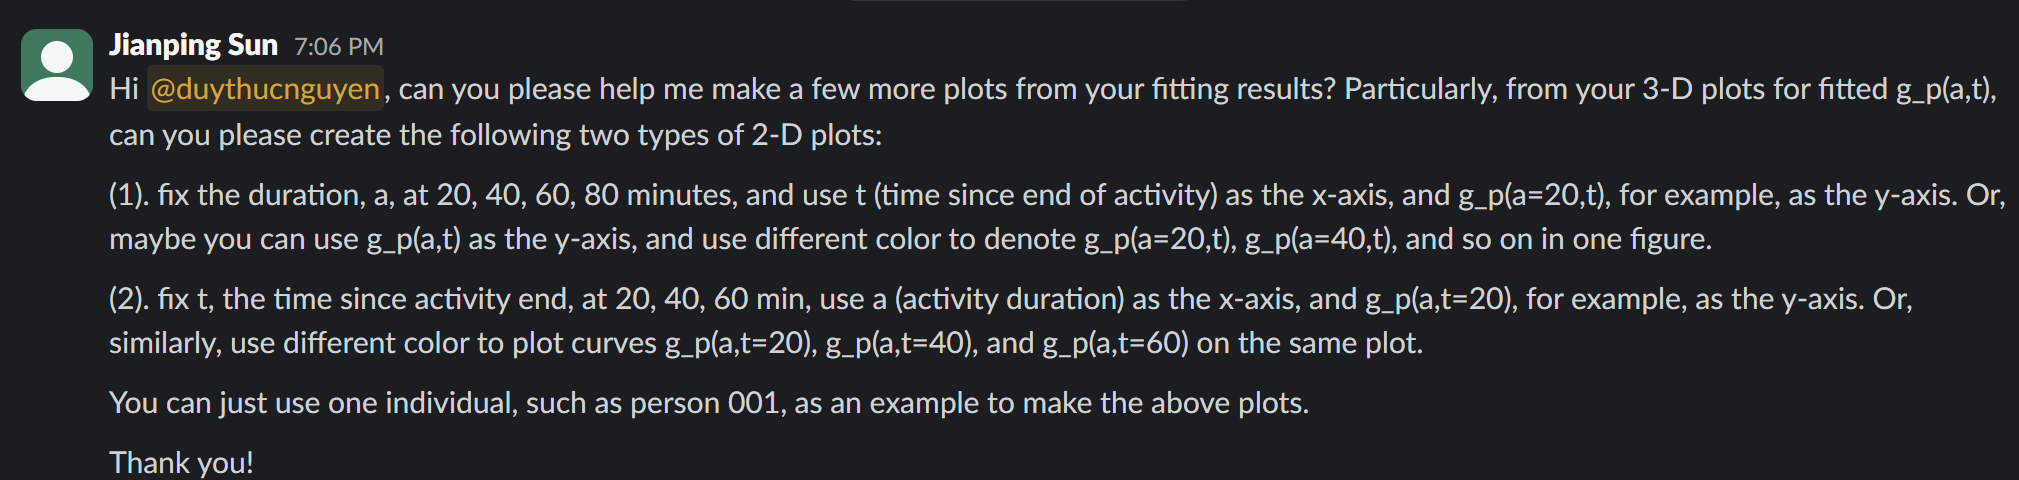

In [ ]:
## 9/30/2024
## Plotting more fitted results according to Dr. Sun above

In [ ]:
def new_pre(ind):
  folder_path = os.path.join(f'/content/drive/My Drive/ResearchProject/JianpingLaptop/{ind}/activity_glucose')
  files = os.listdir(folder_path)
  df_list = []
  A = []
  T = np.arange(0, 65, 5)
  glucose = []

  for bout in files:
    df = pd.read_csv(f'/content/drive/My Drive/ResearchProject/JianpingLaptop/{ind}/activity_glucose/{bout}')
    df = df.tail(13) # We only select the one hour period after activity has ended
    df.reset_index(drop=True, inplace=True)
    random_perturbation = np.random.normal(0, 0.01)
    df['duration'] = df['duration'] + random_perturbation
    if df['duration'].iloc[0] > 180:
      continue
    # df['time'] = df.index * 5
    A.append(df['duration'].iloc[0])
    df['d_glucose'] = df['glucose'] - df['glucose'].iloc[0]
    df_list.append(df)
    glucose.append(list(df['d_glucose']))

  sorted_dflist = sorted(df_list, key=lambda x: x['duration'].iloc[0])
  df_list = sorted_dflist

  A = sorted(A)
  glucose = np.array(glucose)
  T = np.array(T)
  A = np.array(A)

  return glucose, A, T

In [ ]:
def new_bivariate_GAM(ind, lam):
  glucose, A, T = new_pre(ind)

  xdata = [A, T]
  ydata = np.array(glucose)
  i, j = np.meshgrid(A, T)
  i, j = i.T, j.T
  # print(ydata)
  X_domain = np.linspace(A.min(), A.max(), 501)
  Y_domain = np.linspace(T.min(), T.max(), 500)
  domain = [X_domain, Y_domain]
  model = csaps(xdata, ydata, smooth = lam)

  y_data_s = model(domain)
  X, Y = np.meshgrid(X_domain, Y_domain)
  X, Y = X.T, Y.T

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel('Duration (min)')
  ax.set_ylabel('Time since acticity ended(min)')
  ax.set_zlabel('d_glucose')
  ax.scatter(i, j, ydata)
  ax.set_title(f'Person {ind}')
  # ax.view_init(elev=30, azim = 120)
  ax.plot_surface(X, Y, y_data_s, cmap='viridis')

  # fig = go.Figure(data=[go.Surface(z=ydata_s, x = X_domain, y = Y_domain)])

  # fig.update_layout(title='Glucose Post-Activity', autosize=False,
  #                 width=500, height=500,
  #                 margin=dict(l=65, r=50, b=65, t=90))

  fig.show()
  plt.show()
  return X, Y, y_data_s

In [ ]:
def plot_glucose_per_bin(ind, lam, duration_bins=[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 200)]):

    glucose, A, T = new_pre(ind)

    T_domain = np.linspace(T.min(), T.max(), 500)

    for (min_A, max_A) in duration_bins:
        relevant_indices = (A >= min_A) & (A < max_A)
        if np.sum(relevant_indices) == 0:
            continue

        xdata = T
        ydata = glucose[relevant_indices, :]

        ydata_combined = ydata.flatten()
        xdata_combined = np.repeat(xdata, ydata.shape[0])

        sort_indices = np.argsort(xdata_combined)
        xdata_sorted = xdata_combined[sort_indices]
        ydata_sorted = ydata_combined[sort_indices]

        unique_indices = np.unique(xdata_sorted, return_index=True)[1]
        xdata_unique = xdata_sorted[np.sort(unique_indices)]
        ydata_unique = ydata_sorted[np.sort(unique_indices)]

        plt.figure(figsize=(10, 6))
        plt.title(f'Glucose vs. Time since Activity Ended for Individual {ind}\nDuration {min_A}–{max_A} min')

        for i in range(ydata.shape[0]):
            plt.scatter(xdata, ydata[i, :], alpha=0.6, label=f'Raw Data {i+1}' if i == 0 else "")

        model = csaps(xdata_unique, ydata_unique, smooth=lam)
        y_fitted = model(T_domain)
        plt.plot(T_domain, y_fitted, color='orange', alpha=0.7, label='Combined Fitted Spline')
        plt.xlabel('Time since activity ended (min)')
        plt.ylabel('Glucose Variation (mg/dL)')
        plt.grid(True)
        plt.legend()
        plt.show()


In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  plot_glucose_per_bin(ind, 0.5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def plot_glucose_fixed_duration(ind, lam, duration_bins=[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 200)]):

    glucose, A, T = new_pre(ind)

    T_domain = np.linspace(T.min(), T.max(), 500)

    plt.figure(figsize=(10, 6))

    for (min_A, max_A) in duration_bins:
        relevant_indices = (A >= min_A) & (A < max_A)
        if np.sum(relevant_indices) == 0:
            continue

        xdata = [T]
        ydata = glucose[relevant_indices, :]

        ydata_mean = ydata.mean(axis=0) ## We use average glucose to fit on 2d. We could also let csaps use raw y data and try to fit the spline to minimize error

        model = csaps(T, ydata_mean, smooth=lam)
        plt.plot(T_domain, model(T_domain), label=f'Activity Duration {min_A}–{max_A} min')

    plt.xlabel('Time since activity (mins)')
    plt.ylabel('Glucose Variation')
    plt.title(f'Individual {ind} Glucose vs. Time since Activity Ended')
    plt.legend()
    plt.grid(True)
    plt.show()

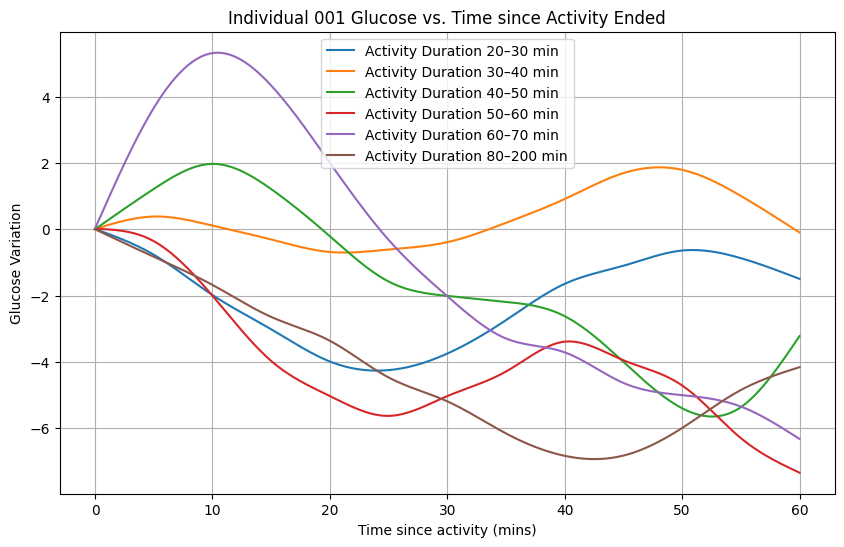

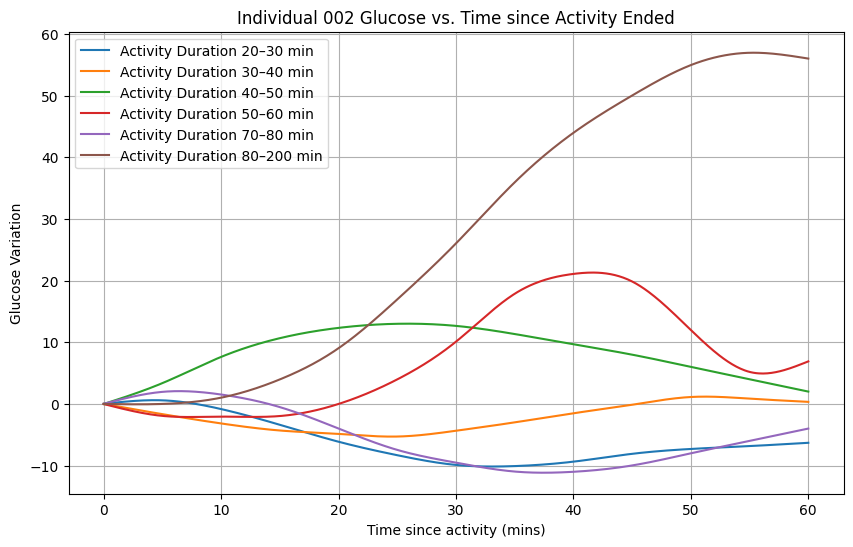

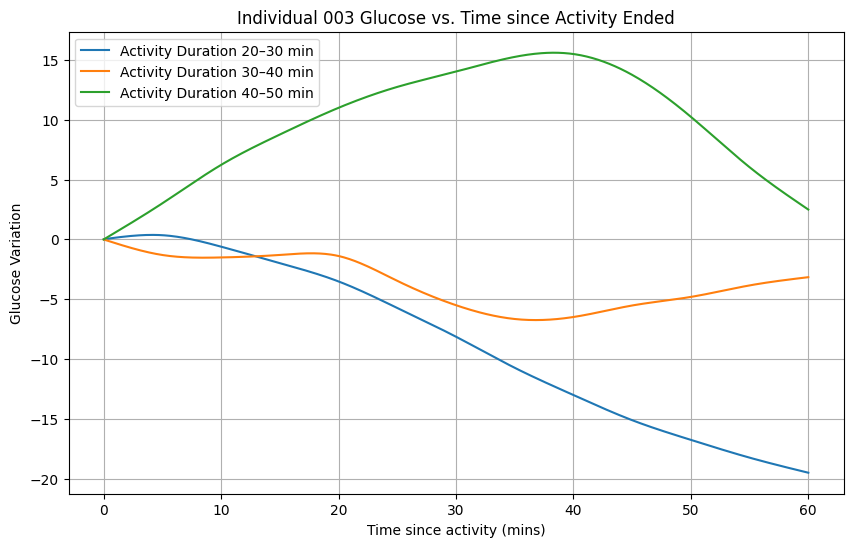

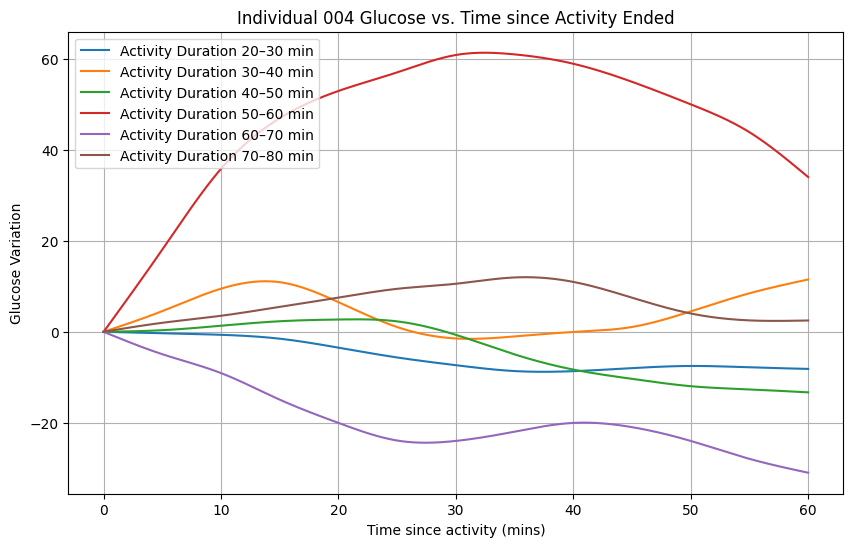

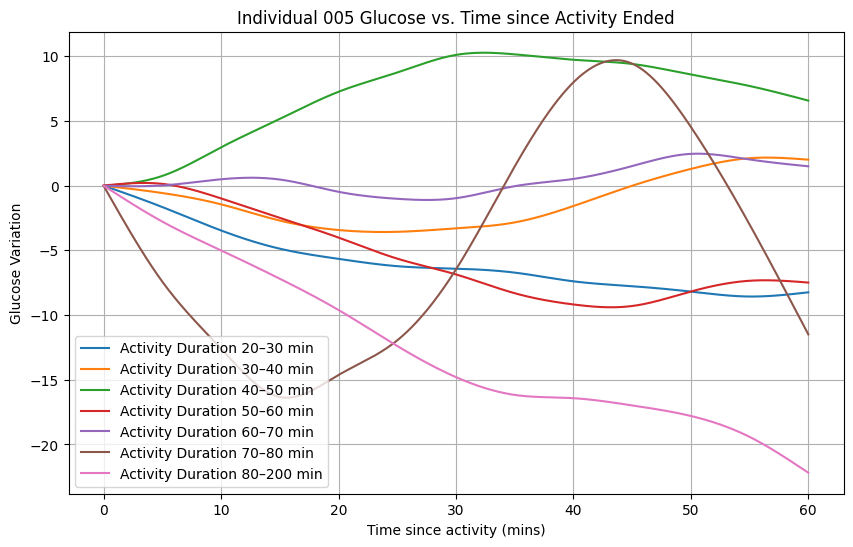

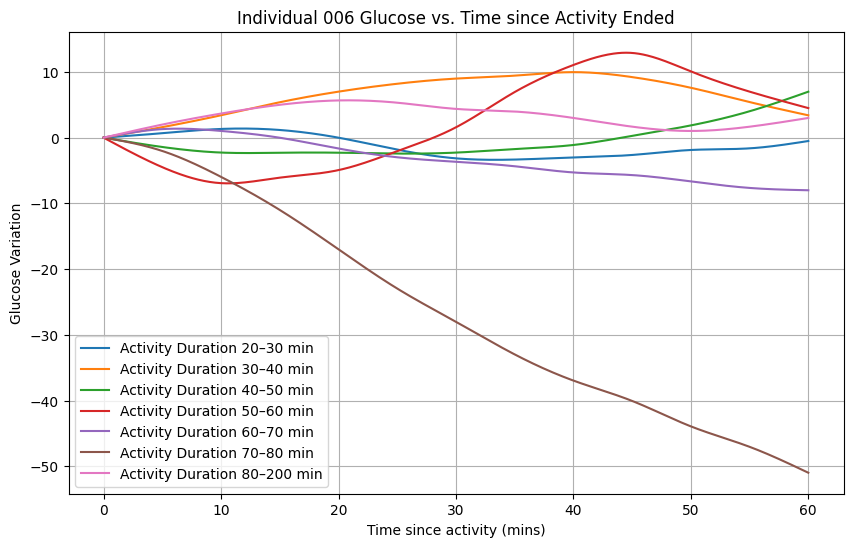

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  plot_glucose_fixed_duration(ind, 0.5)

In [ ]:
# Plots request (1). from Dr. Jianping
def GAM_slicer_fixed_duration(ind, lam, fixed_durations=[20, 40, 60, 80]):
    X, Y, y_data_s = new_bivariate_GAM(ind, lam)

    T_domain = np.linspace(Y.min(), Y.max(), 500)
    plt.figure(figsize=(10, 6))
    plt.title(f'Glucose Variation vs. Time Since Activity Ended for Individual {ind}')
    plt.xlabel('Time since activity ended (min)')
    plt.ylabel(r'g_p(t)')

    for duration in fixed_durations:
        closest_index = np.argmin(np.abs(X[:, 0] - duration))
        closest_value = X[closest_index, 0]

        if abs(closest_value - duration) > 5:
            print(f"Skipping duration {duration} for individual {ind} due to deviation.")
            continue

        print(f"Closest index for duration {duration}: {closest_index}, X value: {closest_value}")

        glucose_slice = y_data_s[closest_index, :]
        plt.plot(T_domain, glucose_slice, label=f'Duration {duration} min')

    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  GAM_slicer_fixed_duration(ind, 0.5)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Plots requestion (2). from Dr. Jianping
def GAM_slicer_fixed_time(ind, lam, fixed_times=[20, 40, 60]):
    X, Y, y_data_s = new_bivariate_GAM(ind, lam)

    plt.figure(figsize=(10, 6))
    plt.title(f'Glucose Variation vs. Activity Duration for Individual {ind}')
    plt.xlabel('Activity Duration (min)')
    plt.ylabel(r'g_p(t)')

    for time in fixed_times:
        closest_index = np.argmin(np.abs(Y[0, :] - time))
        closest_value = Y[0, closest_index]

        if abs(closest_value - time) > 5:
            print(f"Skipping time {time} for individual {ind} due to deviation.")
            continue

        print(f"Closest index for time {time}: {closest_index}, Y value: {closest_value}")

        glucose_slice = y_data_s[:, closest_index]

        A_domain = np.linspace(X.min(), X.max(), len(glucose_slice))

        plt.plot(A_domain, glucose_slice, label=f'Time {time} min')

    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for i in range(1, 17):
  if i < 10:
    ind = f'00{i}'
  else:
    ind = f'0{i}'
  GAM_slicer_fixed_time(ind, 0.5)

Output hidden; open in https://colab.research.google.com to view.